In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Ch10, P.13

In [2]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/polyamine.dat",delim_whitespace=True)
x=mydata.iloc[:,0].to_numpy()
n=x.shape[0]
x=np.c_[np.ones(n),x]
p=x.shape[1]
y=mydata.iloc[:,1].to_numpy()

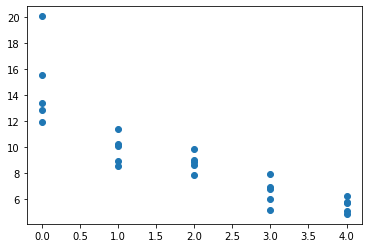

In [3]:
plt.plot(x[:,1],y,linewidth=0,marker='o')
plt.show()

In [4]:
ydot=y.prod()**(1/n)
mysse=[]
lr=[1,.8,.6,.4,.2,0,-.2,-.4,-.5,-.6,-.8,-1]
for l in lr:
  if (l==0):
    y1=ydot*np.log(y)
  else:
    y1=(y**l-1)/l/ydot**(l-1)
  beta1=np.linalg.inv(x.T @ x) @ x.T @ y1
  sse=((y1-x @ beta1)**2).sum()
  mysse.append([l,sse])

In [5]:
mysse

[[1, 77.98306400000003],
 [0.8, 63.66932232505988],
 [0.6, 52.76342516090138],
 [0.4, 44.59051372697622],
 [0.2, 38.63790575897053],
 [0, 34.51945224986623],
 [-0.2, 31.94866897820869],
 [-0.4, 30.718589621087805],
 [-0.5, 30.559611027076144],
 [-0.6, 30.68680312378511],
 [-0.8, 31.764528173602937],
 [-1, 33.908874202246594]]

In [6]:
y1=np.log(y)
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y1
print(beta)
yhat=x @ beta
res=y1-yhat
sse=np.sum(res**2)
sst=sum((y1-y1.mean())**2)
rsq=1-sse/sst
print(rsq)

[ 2.61301653 -0.23551587]
0.8535244485518312


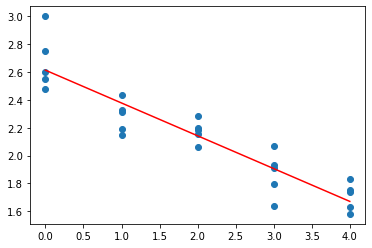

In [7]:
xsorted=np.sort(x[:,1])
plt.plot(x[:,1],y1,linewidth=0,marker='o')
plt.plot(xsorted, beta[0]+beta[1]*xsorted, color='red')
plt.show()

0.13797797648891685


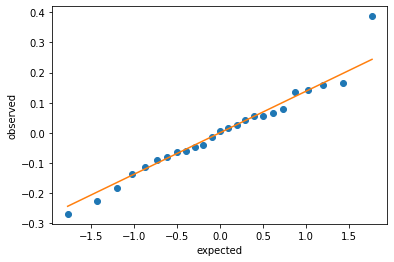

In [8]:
rsorted=np.sort(res)
exp_q=stats.norm().ppf(np.linspace(1,n,n)/(n+1))
sdr=np.std(res)
print(sdr)
rx0=[min(exp_q),max(exp_q)]
ry0=[min(exp_q)*sdr,max(exp_q)*sdr]
plt.plot(exp_q,rsorted,marker='o',linewidth=0)
plt.plot(rx0, ry0, linestyle = '-')
plt.xlabel('expected')
plt.ylabel('observed')
plt.show()

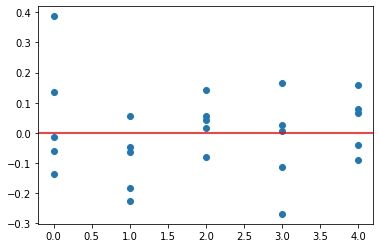

In [9]:
plt.plot(x[:,1],res,linewidth=0,marker='o')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()